# Today's challenge: Create a neural network capable of identifying circles
Bonus points for identifying circle center and radius?

In [1]:
import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt

In [2]:
IMG_SIZE = 100 # All our circles will be in square this many pixels wide

In [3]:
def draw_circle(x,y,rad,size):
    """
    Create a binary 2D matrix representation of a circle
    :param x: x coordinate of circle center
    :param y: y coordinate of circle center
    :param rad: radius of circle
    :param size: size of the matrix (size x size)
    :return: torch matrix (size x size) with 1s representing the circle
    """
    pic = torch.zeros(size,size)
    for i in range(size):
        for j in range(size):
            dx = i-x
            dy = j-y
            d = math.sqrt(dx*dx + dy*dy)
            if abs(d-rad) < 1.5:
                pic[i,j] = 1
            else:
                pic[i,j] = 0
    return pic   

In [4]:
# Create a 2D representation of a circle, radius 10 at (30,30)
circ30 = draw_circle(30, 30, 10, IMG_SIZE)

In [5]:
circ30 # Output of draw_circle is a 2D array of mostly 0s

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

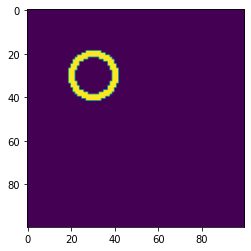

In [6]:
plt.imshow(circ30) # Here's a visual representation of our circle

In [7]:
    class NeuralNetwork(nn.Module):
        def __init__(self):
            super(NeuralNetwork, self).__init__()

            self.conv_stage_1 = nn.Conv2d(
                in_channels  = 1,
                padding      = 0,
                out_channels = 1, # may change?
                kernel_size  = 4  # may change
                )

            self.flatten = nn.Flatten()
            self.linear_relu_stack = nn.Sequential(
                nn.Linear(28*28, 512),
                nn.ReLU(),
                nn.Linear(512, 512),
                nn.ReLU(),
                nn.Linear(512, 10),
                nn.ReLU()
            )

        def forward(self, our_data):
            x2 = self.conv_stage_1(our_data)
            # x2 = self.flatten(x1)
            # logits = self.linear_relu_stack(x2)
            # return logits
            return x2

In [8]:
net = NeuralNetwork() # Create an instance of our neural network class, name it "net"

In [9]:
# Massage circ30 (a 2D array of mostly 0s and some 1s representing a circle) into something we can use
net_input = circ30.unsqueeze(0).unsqueeze(0)

Note: According to https://stackoverflow.com/a/59566009 Conv2D and many other layers expect input conforming to (n_samples, channels, height, width) # e.g., (1000, 1, 224, 224)

So the two unsqueezes above simply pad the input with 1 sample dimension and 1 channel dimension [100, 100] -> [1, 1, 100, 100]

Also, unsqueeze seems like it's helpful for hacking stuff together early on - it just adds a dimension at the specified index

In [10]:
net_input.shape # Our network input is of shape [1, 1, 100, 100]

torch.Size([1, 1, 100, 100])

In [11]:
ans = net(net_input) # Run input through the network - No training being done here, just one forward pass

In [12]:
ans.shape # Show the shape of our network output

torch.Size([1, 1, 97, 97])

### Question: We lose 3 pixels (100 -> 97).  Why?  Padding?  Stride?  Kernel Size?

If the kernal is focused near the edge of the picture, we could lose some data (unless we pad the edges by the correct amount) Given padding of 0 and kernel size 4, we likely lose one pixel to the edge on one side and two pixels to the edge on the other side.

I think the best way to make sure the image doesn't shrink or embiggen is to use an odd sized kernel (so we use same padding/overlap on all sides) and have a padding of (kernel size / 2) rounded down to account for the remainder pixel in the middle.

Alternatively, If the stride is such that we "skip" some pixels, the image will be shrunk (not the case here though stride = 1 so we hit every pixel)

In [13]:
ans

tensor([[[[-0.1684, -0.1684, -0.1684,  ..., -0.1684, -0.1684, -0.1684],
          [-0.1684, -0.1684, -0.1684,  ..., -0.1684, -0.1684, -0.1684],
          [-0.1684, -0.1684, -0.1684,  ..., -0.1684, -0.1684, -0.1684],
          ...,
          [-0.1684, -0.1684, -0.1684,  ..., -0.1684, -0.1684, -0.1684],
          [-0.1684, -0.1684, -0.1684,  ..., -0.1684, -0.1684, -0.1684],
          [-0.1684, -0.1684, -0.1684,  ..., -0.1684, -0.1684, -0.1684]]]],
       grad_fn=<MkldnnConvolutionBackward>)